In [5]:
import pandas_datareader.data as pdr
start='1949/5/16'
end='2016/9/30'
N225 = pdr.DataReader('NIKKEI225', 'fred', start, end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [7]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


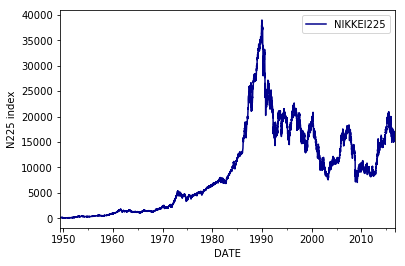

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

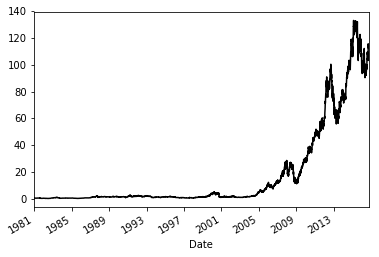

In [81]:
price = pdr.DataReader('aapl', 'yahoo', '1970/1/4', end)
price.Close.plot(color='black')

In [31]:
price.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-30,112.459999,113.370003,111.800003,113.050003,111.090431,36379100.0


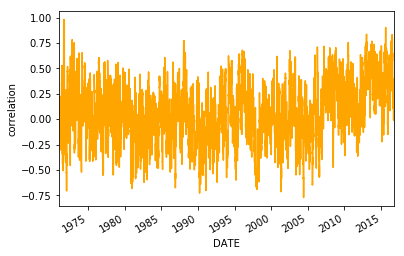

In [47]:
import pandas as pd
fx = pdr.DataReader('DEXJPUS', 'fred', start, end)
port = pd.concat([N225, fx], axis=1).dropna()
n=port.NIKKEI225.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color='orange')
plt.ylabel('correlation')

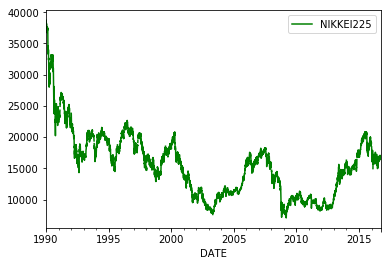

In [51]:
price1=N225.loc['1990/1/1':]
price1.plot(color='green')

In [54]:
price2=price.ix['2015',0:2]
price2.tail(1)

,Open,High
Date,,
2015-12-31,107.010002,107.029999


In [67]:
print(price.resample('4Q').first().tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-31   58.485714   58.928570   58.428570   58.747143   52.852215   
2013-12-31   79.117142   79.285713   77.375717   78.432854   71.189217   
2014-12-31   79.382858   79.575714   78.860001   79.018570   73.522530   
2015-12-31  111.389999  111.440002  107.349998  109.330002  103.866470   
2016-12-31  102.610001  105.370003  102.000000  105.349998  101.790649   

                 Volume  
Date                     
2012-12-31   75555200.0  
2013-12-31  140129500.0  
2014-12-31   58671200.0  
2015-12-31   53204600.0  
2016-12-31   67649400.0  


In [68]:
print(price.resample('4Q').last().tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-31   72.932854   76.485718   72.714287   76.024284   69.003082   
2013-12-31   79.167145   80.182854   79.142860   80.145714   74.571281   
2014-12-31  112.820000  113.129997  110.209999  110.379997  104.863991   
2015-12-31  107.010002  107.029999  104.820000  105.260002  101.703697   
2016-12-31  112.459999  113.370003  111.800003  113.050003  111.090431   

                 Volume  
Date                     
2012-12-31  164873100.0  
2013-12-31   55771100.0  
2014-12-31   41403400.0  
2015-12-31   40912300.0  
2016-12-31   36379100.0  


In [69]:
N225.resample('M').ohlc().tail()

NIKKEI225                              
                open      high       low     close
DATE                                              
2016-05-31  16147.38  17234.98  16106.72  17234.98
2016-06-30  16955.73  16955.73  14952.02  15575.92
2016-07-31  15682.48  16810.22  15106.98  16569.27
2016-08-31  16635.77  16919.92  16083.11  16887.40
2016-09-30  16926.84  17081.98  16405.01  16449.84

In [72]:
print(price.resample('4Q').agg({'Open': 'first',
                                              'High': 'max',
                                              'Low': 'min',
                                              'Close': 'last'}).tail())

                  Open        High        Low       Close
Date                                                     
2012-12-31   58.485714  100.724289  58.428570   76.024284
2013-12-31   79.117142   82.162857  55.014286   80.145714
2014-12-31   79.382858  119.750000  70.507141  110.379997
2015-12-31  111.389999  134.539993  92.000000  105.260002
2016-12-31  102.610001  116.180000  89.470001  113.050003


In [82]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol)
print(len(price))

0.474852650503
9030


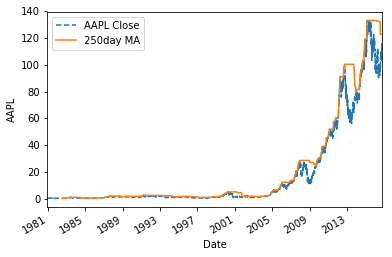

In [88]:
ma = pd.Series.rolling(price.Close, window=250).max()
price.Close.plot(label='AAPL Close', style='--')
ma.plot(label='250day MA')
plt.ylabel('AAPL')
plt.legend()

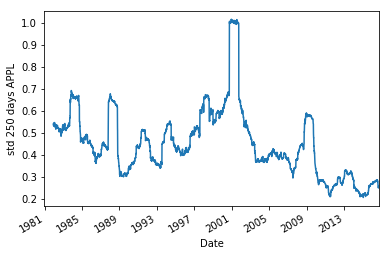

In [90]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=250).std()*np.sqrt(250)).plot()
plt.ylabel('std 250 days APPL')